## Finding the main features

This notebook is used to find the main features from listings.csv.

In [1]:
import pandas as pd
import folium
import math
import numpy as np
import re
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_columns', None)

In [2]:
listing_df = pd.read_csv('listings.csv')
listing_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,777451666060243581,https://www.airbnb.com/rooms/777451666060243581,20230307175359,2023-03-07,city scrape,Family oriented home,Relax with the whole family at this peaceful p...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,490709958,https://www.airbnb.com/users/show/490709958,Dana,2022-12-08,NaN,NaN,within an hour,100%,0%,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,NaN,1.0,1.0,['phone'],f,t,NaN,Castaic Canyons,Unincorporated Areas,34.43925,-118.44409,Private room in home,Private room,7,NaN,3.5 baths,4.0,3.0,"[""Wifi"", ""Exercise equipment"", ""Carbon monoxid...",$399.00,3,365,3.0,3.0,365.0,365.0,3.0,365.0,NaN,t,27,57,87,87,2023-03-07,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,698097753730921190,https://www.airbnb.com/rooms/698097753730921190,20230307175359,2023-03-07,city scrape,方便易居驿站,NaN,NaN,https://a0.muscache.com/pictures/d5afff58-d576...,444692513,https://www.airbnb.com/users/show/444692513,Hanna,2022-02-12,NaN,Hana,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/63f78...,https://a0.muscache.com/im/pictures/user/63f78...,NaN,4.0,5.0,['phone'],t,t,NaN,Pomona,Other Cities,34.04848,-117.76887,Private room in villa,Private room,2,NaN,1 shared bath,1.0,1.0,"[""Bed linens"", ""Wifi"", ""Carbon monoxide alarm""...",$46.00,3,90,6.0,6.0,90.0,90.0,6.0,90.0,NaN,t,27,57,87,87,2023-03-07,5,5,0,2022-09-15,2023-01-16,5.00,5.00,5.00,5.00,5.00,5.00,4.40,NaN,f,4,0,4,0,0.86
2,13063118,https://www.airbnb.com/rooms/13063118,20230307175359,2023-03-07,city scrape,TERRANEA OCEANFRNT 1BR CASITA -203 RSRT AMENIT...,LOCATION! Luxury upstairs Oceanside Casita gue...,No need to fly away from Los Angeles for a get...,https://a0.muscache.com/pictures/6227287c-7073...,41736985,https://www.airbnb.com/users/show/41736985,Beth,2015-08-17,NaN,NaN,within an hour,100%,86%,f,https://a0.muscache.com/im/users/41736985/prof...,https://a0.muscache.com/im/users/41736985/prof...,Rancho Palos Verdes,15.0,22.0,"['email', 'phone']",t,t,"Rancho Palos Verdes, California, United States",Rancho Palos Verdes,Other Cities,33.73842,-118.39580,Private room in resort,Private room,3,NaN,1 bath,1.0,1.0,"[""Shared hot tub"", ""Wifi"", ""Refrigerator"", ""Gy...",$408.00,3,29,2.0,3.0,7.0,29.0,3.0,11.5,NaN,t,6,18,40,270,2023-03-07,53,13,0,2016-06-03,2022-11-26,4.92,4.90,4.94,4.96,4.96,4.92,4.83,NaN,f,10,5,5,0,0.64
3,39337076,https://www.airbnb.com/rooms/39337076,20230307175359,2023-03-07,city scrape,Brand New Duplex Near World Cruise Center,Welcome to our new cozy duplex!<br /><br />Loc...,"Our property is close to downtown San Pedro, t...",https://a0.muscache.com/pictures/miso/H

In [3]:
new_df = listing_df.copy()
new_df = new_df.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
                      'description', 'neighborhood_overview', 'picture_url', 'host_id',
                      'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
                      'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 
                      'host_listings_count', 'host_total_listings_count', 'host_verifications',
                      'neighbourhood', 'neighbourhood_group_cleansed', 'latitude', 'neighbourhood_cleansed',
                      'longitude', 'bathrooms', 'calendar_updated', 'has_availability',
                      'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
                      'minimum_maximum_nights', 'maximum_maximum_nights', 'property_type',
                      'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
                      'availability_60', 'availability_90', 'availability_365',
                      'calendar_last_scraped','number_of_reviews_ltm', 'number_of_reviews_l30d', 
                      'first_review', 'last_review', 'license', 'calculated_host_listings_count',
                      'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
                      'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
                      'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                      'review_scores_checkin', 'review_scores_communication','review_scores_location', 
                      'review_scores_value'], axis = 1)

new_df.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'number_of_reviews',
       'instant_bookable'],
      dtype='object')

In [4]:
new_df.shape

(42451, 16)

### Data cleaning and preprocess

In [5]:
new_df.isna().sum()

host_response_time        9375
host_response_rate        9375
host_acceptance_rate      8343
host_is_superhost          159
host_has_profile_pic         2
host_identity_verified       2
room_type                    0
accommodates                 0
bathrooms_text              41
bedrooms                  3619
beds                       597
amenities                    0
price                        0
minimum_nights               0
number_of_reviews            0
instant_bookable             0
dtype: int64

Fill in the missing value by 0 for following columns: 'host_response_rate', 'host_acceptance_rate', 'bathrooms_text','bedrooms','beds'and 7 scores

In [6]:
columns_fill_by_zero = ['host_response_rate', 'host_acceptance_rate','bathrooms_text','bedrooms','beds']

new_df[columns_fill_by_zero] = new_df[columns_fill_by_zero].fillna(0)

#### Fill in the missing value in 'host_response_time' to 'no response'.

In [7]:
new_df['host_response_time'] = new_df['host_response_time'].fillna('no response')

#### Fill in the missing value by "f" for following columns:

In [8]:
columns_fill_by_f = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified']
new_df[columns_fill_by_f] = new_df[columns_fill_by_f].fillna('f')

In [9]:
missing_values = new_df.isna()
if missing_values.any().any():
    print("Missing values exist in the DataFrame")
else:
    print("No missing values found in the DataFrame")

No missing values found in the DataFrame


#### Replace True as 1, False as 0 for following columns:

'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable'

In [10]:
columns_to_convert = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
convert_tf = {'t': 1, 'f': 0}

for tf_column in columns_to_convert:
    new_df[tf_column] = new_df[tf_column].map(convert_tf)

In [11]:
new_df['host_is_superhost'].unique()

array([0, 1])

In [12]:
new_df['host_response_time'].value_counts()

host_response_time
within an hour        26037
no response            9375
within a few hours     4341
within a day           2114
a few days or more      584
Name: count, dtype: int64

In [13]:
mapping = {
    'no response': 0,
    'within an hour': 1,
    'within a few hours': 2,
    'within a day': 3,
    'a few days or more': 4,
}
new_df['host_response_time'] = new_df['host_response_time'].map(mapping)

#### Columns need to convert percentage to decimal places:

'host_acceptance_rate' and 'host_response_rate'

In [14]:
new_df['host_acceptance_rate'].unique()

array(['0%', '100%', '86%', '99%', 0, '63%', '97%', '98%', '94%', '88%',
       '92%', '25%', '95%', '96%', '33%', '93%', '85%', '80%', '67%',
       '83%', '14%', '59%', '84%', '91%', '90%', '54%', '65%', '68%',
       '82%', '50%', '46%', '77%', '79%', '89%', '60%', '71%', '81%',
       '61%', '56%', '40%', '74%', '75%', '29%', '27%', '70%', '47%',
       '36%', '57%', '43%', '76%', '66%', '35%', '20%', '87%', '78%',
       '41%', '62%', '73%', '39%', '10%', '48%', '21%', '38%', '31%',
       '55%', '49%', '44%', '22%', '18%', '64%', '17%', '30%', '13%',
       '42%', '58%', '12%', '69%', '72%', '26%', '15%', '23%', '45%',
       '37%', '52%', '53%', '5%', '8%', '51%', '32%', '34%', '11%', '24%',
       '6%', '9%', '7%'], dtype=object)

In [15]:
# host_acceptance_rate
new_df['host_acceptance_rate'] = new_df['host_acceptance_rate'].replace(0, '0%')
new_df['host_acceptance_rate'] = new_df['host_acceptance_rate'].str.rstrip('%').astype(float)
new_df['host_acceptance_rate'] = new_df['host_acceptance_rate'] / 100

# host_response_rate
new_df['host_response_rate'] = new_df['host_response_rate'].replace(0, '0%')
new_df['host_response_rate'] = new_df['host_response_rate'].str.rstrip('%').astype(float)
new_df['host_response_rate'] = new_df['host_response_rate'] / 100

In [16]:
new_df['host_response_rate']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
42446    1.0
42447    1.0
42448    1.0
42449    1.0
42450    1.0
Name: host_response_rate, Length: 42451, dtype: float64

#### Remove symbol '$' in price column

In [17]:
new_df['price']

0          $399.00
1           $46.00
2          $408.00
3           $80.00
4        $2,138.00
           ...    
42446       $40.00
42447       $48.00
42448       $46.00
42449       $68.00
42450       $48.00
Name: price, Length: 42451, dtype: object

In [18]:
new_df['price'] = new_df['price'].str.replace('$', '')
new_df['price'] = new_df['price'].str.replace(',', '')
new_df['price'] = pd.to_numeric(new_df['price'])

Clean the 'bathroom_text' column to make the data constant:

In [19]:
new_df['bathrooms_text'].unique()

array(['3.5 baths', '1 shared bath', '1 bath', '2 baths', 'Half-bath',
       '2.5 baths', '3 baths', '1 private bath', '1.5 shared baths',
       '1.5 baths', '5 baths', '0 baths', '6 baths', '2 shared baths',
       '4 baths', '7.5 baths', '5.5 baths', '4.5 baths', '0 shared baths',
       '11 baths', '2.5 shared baths', 0, '8 baths', 'Shared half-bath',
       '3 shared baths', '7 baths', '8.5 baths', '8 shared baths',
       '6.5 baths', '9 baths', '11 shared baths', '3.5 shared baths',
       '9.5 baths', '10 baths', '11.5 baths', '5 shared baths',
       '4 shared baths', '8.5 shared baths', 'Private half-bath',
       '5.5 shared baths', '21.5 baths', '13.5 baths', '4.5 shared baths',
       '12 baths', '21 baths', '20 baths', '10 shared baths',
       '12.5 baths', '10.5 baths', '13 baths', '15 baths',
       '11.5 shared baths'], dtype=object)

In [20]:
# Convert the 'Baths' column to string type
new_df['bathrooms_text'] = new_df['bathrooms_text'].astype(str)

# Make data constant
new_df['bathrooms_text'] = new_df['bathrooms_text'].replace('1 private bath', '1 bath')
new_df['bathrooms_text'] = new_df['bathrooms_text'].replace('0', '0 bath')

# Replace half to 0.5
new_df['bathrooms_text'] = new_df['bathrooms_text'].str.replace('Half-bath', '0.5 baths')
new_df['bathrooms_text'] = new_df['bathrooms_text'].str.replace('Shared half-bath', '0.5 shared baths')
new_df['bathrooms_text'] = new_df['bathrooms_text'].str.replace('Private half-bath', '0.5 baths')

In [21]:
# Private bathroom = 1, Shared bathroom = 2
new_df['bathroom_type'] = new_df['bathrooms_text'].apply(lambda x: 0 if 'shared' in str(x) else 1)

In [22]:
# Remove text
new_df['bathrooms_text'] = new_df['bathrooms_text'].apply(lambda x: re.sub('[^\d.]+', '', str(x)))

# Rename column
new_df = new_df.rename(columns={'bathrooms_text': 'bathrooms'})

# Convert to float
new_df['bathrooms'] = new_df['bathrooms'].astype(float)

In [23]:
new_df['bathrooms'].unique()

array([ 3.5,  1. ,  2. ,  0.5,  2.5,  3. ,  1.5,  5. ,  0. ,  6. ,  4. ,
        7.5,  5.5,  4.5, 11. ,  8. ,  7. ,  8.5,  6.5,  9. ,  9.5, 10. ,
       11.5, 21.5, 13.5, 12. , 21. , 20. , 12.5, 10.5, 13. , 15. ])

#### According to the research, the top10 amenities are:

- A pool
- Wi-Fi
- A kitchen
- Free parking
- A jacuzzi
- A washer or dryer
- Air conditioning or heating
- Self check-in
- Laptop-friendly workspace
- Pets allowed

resource: https://www.airbnb.com.au/resources/hosting-homes/a/the-best-amenities-to-offer-right-now-203

If the rental unit have above amenities, it will show 1, else 0.

In [24]:
amenities_df = new_df.copy()

In [25]:
# Remove the square brackets and symbol
amenities_df['amenities'] = amenities_df['amenities'].str.replace('[', '', regex=False).str.replace(']', '', regex=False).str.replace('"', "", regex=False)

# lowercase
amenities_df['amenities'] = amenities_df['amenities'].str.lower()

In [26]:
key_amenities = ['pool', 'wifi', 'kitchen', 'jacuzzi', 'workspace','washer','dryer','air conditioning','heating','self check-in','pets allowed']

for amenity in key_amenities:
    amenities_df[amenity] = amenities_df['amenities'].str.contains(amenity, case=False).astype(int)

# free parking
amenities_df['free_parking'] = (amenities_df['amenities'].str.contains('free', case=False) & amenities_df['amenities'].str.contains('parking', case=False)).astype(int)



In [27]:
# After we convert the top 10 amenities into matrix, we no longer need the 'amenities' column
amenities_df = amenities_df.drop('amenities', axis=1)

In [28]:
amenities_df.sample(3)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,instant_bookable,bathroom_type,pool,wifi,kitchen,jacuzzi,workspace,washer,dryer,air conditioning,heating,self check-in,pets allowed,free_parking
22890,1,1.0,0.97,0,1,1,Entire home/apt,4,2.0,2.0,2.0,165.0,31,0,0,1,1,1,1,0,0,1,1,1,1,1,1,0
36534,4,0.0,0.00,0,1,1,Entire home/apt,3,1.0,1.0,1.0,128.0,30,1,0,1,0,1,1,0,1,0,0,1,0,0,1,0
19087,3,1.0,1.00,0,1,1,Private room,2,1.0,2.0,2.0,49.0,30,0,1,0,0,1,1,0,1,1,1,0,0,1,0,0


In [29]:
amenities_df['room_type'].value_counts()

room_type
Entire home/apt    29491
Private room       12180
Shared room          697
Hotel room            83
Name: count, dtype: int64

#### Convert 'room_type' into matrix by using get_dummies

In [30]:
final_df = amenities_df.copy()

In [31]:
# get.dummies
encoded_df = pd.get_dummies(final_df[['room_type']], dtype=int)
final_df = pd.concat([final_df, encoded_df], axis=1)

In [32]:
# After we convert the room_type and property_type into matrix, we no longer need the 'room_type' column
final_df = final_df.drop(['room_type'], axis=1)

In [33]:
final_df.sample(3)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,instant_bookable,bathroom_type,pool,wifi,kitchen,jacuzzi,workspace,washer,dryer,air conditioning,heating,self check-in,pets allowed,free_parking,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
23896,2,0.94,0.73,1,1,1,2,2.0,2.0,2.0,229.0,2,81,0,1,0,1,1,0,0,1,1,1,1,0,0,1,1,0,0,0
29129,0,0.00,0.00,0,1,1,2,1.0,1.0,1.0,129.0,30,32,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0
991,1,1.00,1.00,1,1,1,7,2.5,2.0,4.0,199.0,30,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,0,1,0


In [34]:
final_df.shape

(42451, 31)

_____

#### Apply scaler

In [35]:
# Find non-binary features
non_binary_cols = ['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'accommodates',
                   'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'number_of_reviews', ]

# Find binary features
binary_cols = [col for col in final_df.columns if col not in non_binary_cols]

non_binary_data = final_df[non_binary_cols]

In [36]:
# Apply standard scaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_binary_data)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=non_binary_cols)

In [37]:
# Apply min-max scaler
minmax_scaler = MinMaxScaler()
minmax_scaled_data = minmax_scaler.fit_transform(non_binary_data)

# Create a new DataFrame with the scaled data
minmax_scaled_df = pd.DataFrame(minmax_scaled_data, columns=non_binary_cols)

In [38]:
# Standard Scaler final dataset
preprocessed_df = pd.concat([final_df[binary_cols], scaled_df], axis=1)

In [39]:
# Min Max Scaler final dataset
minmax_preprocessed_df = pd.concat([final_df[binary_cols], minmax_scaled_df], axis=1)

In [40]:
preprocessed_df.sample(3)

,host_is_superhost,host_has_profile_pic,host_identity_verified,instant_bookable,bathroom_type,pool,wifi,kitchen,jacuzzi,workspace,washer,dryer,air conditioning,heating,self check-in,pets allowed,free_parking,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_response_time,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews
40031,0,1,1,0,1,0,1,1,0,1,0,1,1,1,1,1,0,1,0,0,0,1.216820,0.527775,0.227790,-0.332538,-0.557539,-1.314741,-0.081109,-0.181600,0.377102,-0.423638
38642,0,1,1,0,1,0,1,1,0,1,1,1,1,1,0,0,1,1,0,0,0,2.461374,0.599693,-0.370691,0.765885,0.807324,1.113948,0.542315,0.562064,-0.518534,-0.149861
28153,0,1,1,0,1,0,1,1,0,1,1,1,1,1,0,0,1,1,0,0,0,1.216820,0.599693,0.701586,1.498167,-0.557539,1.923511,1.165740,-0.109454,-0.584877,-0.451016


______

#### Create sample

In [41]:
# sampled2000_df = preprocessed_df.sample(n=2000, random_state=42)
# sampled10000_df = preprocessed_df.sample(n=10000, random_state=82)
# sampled20000_df = preprocessed_df.sample(n=20000, random_state=142)

sampled2000_df = minmax_preprocessed_df.sample(n=2000, random_state=42)
sampled10000_df = minmax_preprocessed_df.sample(n=10000, random_state=82)
sampled20000_df = minmax_preprocessed_df.sample(n=20000, random_state=142)

### Find the main features

#### Find number of components for PCA

In [42]:
# Apply PCA
# 2000 sample
pca2000 = PCA().fit(sampled2000_df)
explained_variance_ratio_2000 = pca2000.explained_variance_ratio_

# 10000 sample
pca10000 = PCA().fit(sampled10000_df)
explained_variance_ratio_10000 = pca10000.explained_variance_ratio_

# 20000 sample
pca20000 = PCA().fit(sampled20000_df)
explained_variance_ratio_20000 = pca20000.explained_variance_ratio_

# Full dataset
pca = PCA().fit(minmax_preprocessed_df)
explained_variance_ratio = pca.explained_variance_ratio_

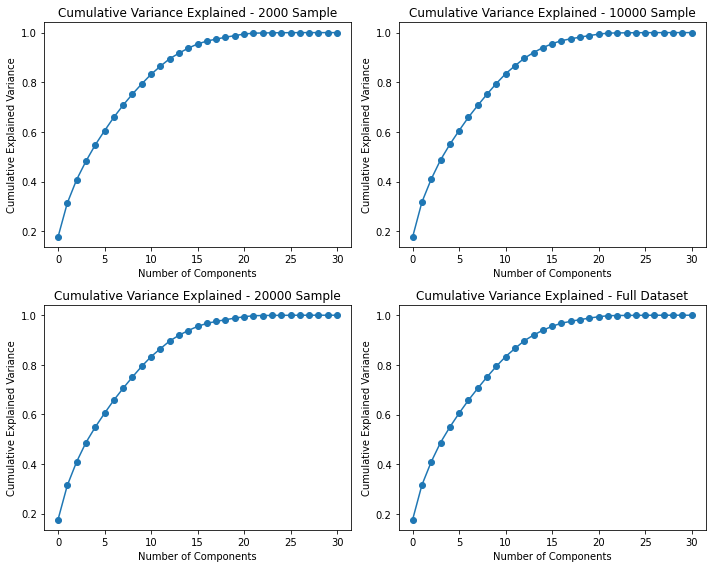

In [43]:
# Create a 2x2 plot
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# 2000 sample
axs[0, 0].plot(np.cumsum(explained_variance_ratio_2000), marker='o')
axs[0, 0].set_xlabel('Number of Components')
axs[0, 0].set_ylabel('Cumulative Explained Variance')
axs[0, 0].set_title('Cumulative Variance Explained - 2000 Sample')

# 10000 sample
axs[0, 1].plot(np.cumsum(explained_variance_ratio_10000), marker='o')
axs[0, 1].set_xlabel('Number of Components')
axs[0, 1].set_ylabel('Cumulative Explained Variance')
axs[0, 1].set_title('Cumulative Variance Explained - 10000 Sample')

# 20000 sample
axs[1, 0].plot(np.cumsum(explained_variance_ratio_20000), marker='o')
axs[1, 0].set_xlabel('Number of Components')
axs[1, 0].set_ylabel('Cumulative Explained Variance')
axs[1, 0].set_title('Cumulative Variance Explained - 20000 Sample')

# Full dataset
axs[1, 1].plot(np.cumsum(explained_variance_ratio), marker='o')
axs[1, 1].set_xlabel('Number of Components')
axs[1, 1].set_ylabel('Cumulative Explained Variance')
axs[1, 1].set_title('Cumulative Variance Explained - Full Dataset')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

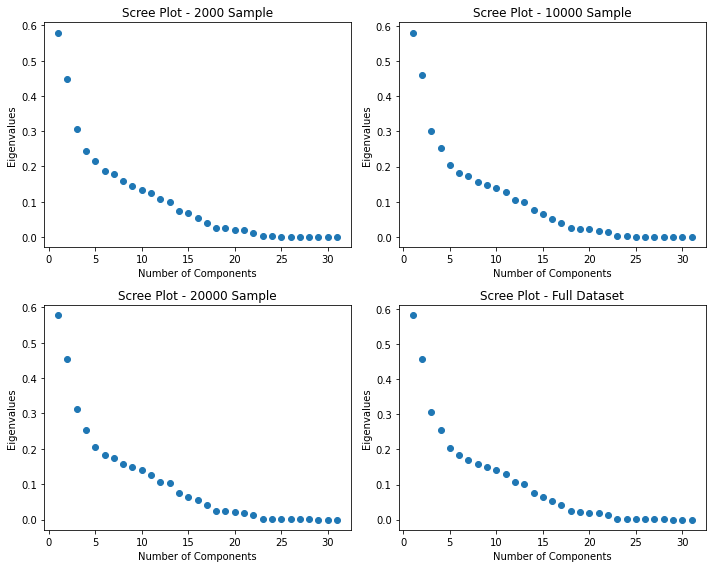

In [44]:
# 2000 sample
eigenvalues_2000 = pca2000.explained_variance_

# 10000 sample
eigenvalues_10000 = pca10000.explained_variance_

# 20000 sample
eigenvalues_20000 = pca20000.explained_variance_

# Full dataset
eigenvalues_ = pca.explained_variance_

x = range(1, len(eigenvalues_) + 1)

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot the scree plots for each dataset

# 2000 sample
axs[0, 0].scatter(x, eigenvalues_2000)
axs[0, 0].set_xlabel('Number of Components')
axs[0, 0].set_ylabel('Eigenvalues')
axs[0, 0].set_title('Scree Plot - 2000 Sample')

# 10000 sample
axs[0, 1].scatter(x, eigenvalues_10000)
axs[0, 1].set_xlabel('Number of Components')
axs[0, 1].set_ylabel('Eigenvalues')
axs[0, 1].set_title('Scree Plot - 10000 Sample')

# 20000 sample
axs[1, 0].scatter(x, eigenvalues_20000)
axs[1, 0].set_xlabel('Number of Components')
axs[1, 0].set_ylabel('Eigenvalues')
axs[1, 0].set_title('Scree Plot - 20000 Sample')

# Full dataset
axs[1, 1].scatter(x, eigenvalues_)
axs[1, 1].set_xlabel('Number of Components')
axs[1, 1].set_ylabel('Eigenvalues')
axs[1, 1].set_title('Scree Plot - Full Dataset')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

#### Find number of components

Based on above result, we can see that 7 components is the best. But it contain very low variance explained.

In [45]:
var = 0.95
pca = PCA(n_components=var)
pca.fit(minmax_preprocessed_df)
print ('Variance:', var)
print ('N_components:', pca.n_components_)

Variance: 0.95
N_components: 16


In [46]:
pca_data = {
    'Number of Components': range(1, pca.n_components_ + 1),
    'Variance Explained': pca.explained_variance_ratio_.cumsum()
}

# Create a DataFrame
pca_var = pd.DataFrame(pca_data)

# Print the DataFrame
pca_var

,Number of Components,Variance Explained
0,1,0.177392
1,2,0.316727
2,3,0.409819
3,4,0.487449
4,5,0.549670
5,6,0.605761
6,7,0.657897
7,8,0.705720
8,9,0.751542
9,10,0.794369


#### Apply PCA

In [90]:
# Change the number of components here!
num_components = 16

In [91]:
pca = PCA(n_components=num_components)
transformed_data = pca.fit_transform(minmax_preprocessed_df)

# Get the loadings or coefficients for each principal component
loadings = pd.DataFrame(np.abs(pca.components_), columns=minmax_preprocessed_df.columns)

In [92]:
loadings

,host_is_superhost,host_has_profile_pic,host_identity_verified,instant_bookable,bathroom_type,pool,wifi,kitchen,jacuzzi,workspace,washer,dryer,air conditioning,heating,self check-in,pets allowed,free_parking,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_response_time,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews
0,0.315586,0.009898,0.087614,0.117651,0.188827,0.063403,0.038579,0.102773,0.000000e+00,0.350461,0.124168,0.139464,0.068232,0.146892,0.370250,0.152837,0.134806,0.315336,0.001257,0.287724,0.026354,0.079874,0.371723,0.359881,0.082469,0.013214,0.018090,0.012937,0.000511,0.004179,0.006679
1,0.272397,0.001228,0.033933,0.178400,0.240880,0.050236,0.011618,0.087965,4.235165e-22,0.239439,0.029620,0.014376,0.028585,0.002218,0.170821,0.195089,0.073366,0.552897,0.000821,0.545527,0.006548,0.028794,0.197310,0.210443,0.068729,0.004404,0.017381,0.009392,0.001413,0.003490,0.003065
2,0.062565,0.010908,0.023582,0.315346,0.027685,0.237531,0.048340,0.251605,0.000000e+00,0.135567,0.438851,0.333863,0.244694,0.402038,0.140912,0.136234,0.273426,0.087428,0.001538,0.094001,0.005035,0.059054,0.216098,0.219421,0.027718,0.014168,0.012158,0.005736,0.000415,0.005399,0.000151
3,0.199576,0.010591,0.050936,0.422115,0.074127,0.605089,0.006030,0.052260,6.938894e-18,0.202505,0.172533,0.097057,0.393893,0.125413,0.304894,0.201230,0.093073,0.028711,0.001290,0.035762,0.005761,0.008882,0.042176,0.034863,0.070695,0.025743,0.018166,0.009987,0.002257,0.002290,0.019549
4,0.441053,0.003099,0.000379,0.112968,0.098533,0.160205,0.010259,0.071844,0.000000e+00,0.016535,0.040894,0.135767,0.053509,0.162841,0.523512,0.591877,0.161540,0.133873,0.002036,0.126140,0.005698,0.041784,0.100756,0.074593,0.017526,0.009687,0.006924,0.003914,0.000856,0.001414,0.004942
5,0.181905,0.013169,0.035936,0.354341,0.090433,0.192527,0.006314,0.093888,5.551115e-17,0.798322,0.130119,0.049033,0.115070,0.115371,0.195964,0.085971,0.148155,0.018209,0.004764,0.016616,0.006357,0.012320,0.115499,0.142630,0.008088,0.003843,0.011040,0.002466,0.000456,0.000822,0.011210
6,0.227377,0.009136,0.052430,0.434702,0.129655,0.035639,0.003427,0.018975,5.030698e-17,0.207821,0.037347,0.025669,0.062987,0.067684,0.410722,0.592873,0.078167,0.105830,0.001628,0.106653,0.000805,0.113824,0.290648,0.193749,0.019749,0.001511,0.000182,0.003149,0.000190,0.001195,0.001983
7,0.175051,0.004467,0.049021,0.406266,0.104348,0.609608,0.042443,0.099288,2.775558e-17,0.053096,0.237782,0.178069,0.247287,0.236763,0.384706,0.074383,0.112781,0.003865,0.001742,0.016113,0.010506,0.031606,0.128067,0.123735,0.005991,0.002757,0.005759,0.001765,0.000942,0.002255,0.001404
8,0.045315,0.003820,0.053493,0.294302,0.062721,0.105624,0.008005,0.233446,1.006140e-16,0.108388,0.427582,0.099026,0.762096,0.106755,0.063144,0.175896,0.049895,0.042552,0.000079,0.039120,0.003354,0.006050,0.027017,0.024641,0.005682,0.003653,0.000996,0.001634,0.000479,0.004181,0.005313
9,0.571614,0.001037,0.222226,0.279420,0.142417,0.126428,0.006081,0.114062,1.110223e-16,0.112862,0.236442,0.068410,0.018019,0.157924,0.133305,0.310873,0.154530,0.006017,0.001608,0.024597,0.029006,0.169237,0.385778,0.283684,0.003296,0.007092,0.005253,0.001361,0.000024,0.002896,0.008761


#### Use loading to find the main features

In [50]:
# Edit the number of top features you want to have here
num_top_features = 10

In [85]:
absolute_loadings = loadings.abs()
num_components = absolute_loadings.shape[0]
rows = (num_components + 1) // 2  
columns = 2

# Create plot for the main features
def abs_loadings_chart(num_components, num_top_features):
    fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(10, 15))
    axes = axes.flatten()
    
    for i in range(num_components):
        top_features = absolute_loadings.iloc[i].nlargest(num_top_features) 
        axes[i].bar(range(len(top_features)), top_features)
        axes[i].set_xticks(range(len(top_features)))
        axes[i].set_xticklabels(top_features.index, rotation='vertical')
        axes[i].set_xlabel('Features')
        axes[i].set_ylabel('Absolute Loadings')
        axes[i].set_title(f'PC{i+1} (n_component={num_components})', fontweight='bold')

    if num_components < rows * columns:
        for i in range(num_components, rows * columns):
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()

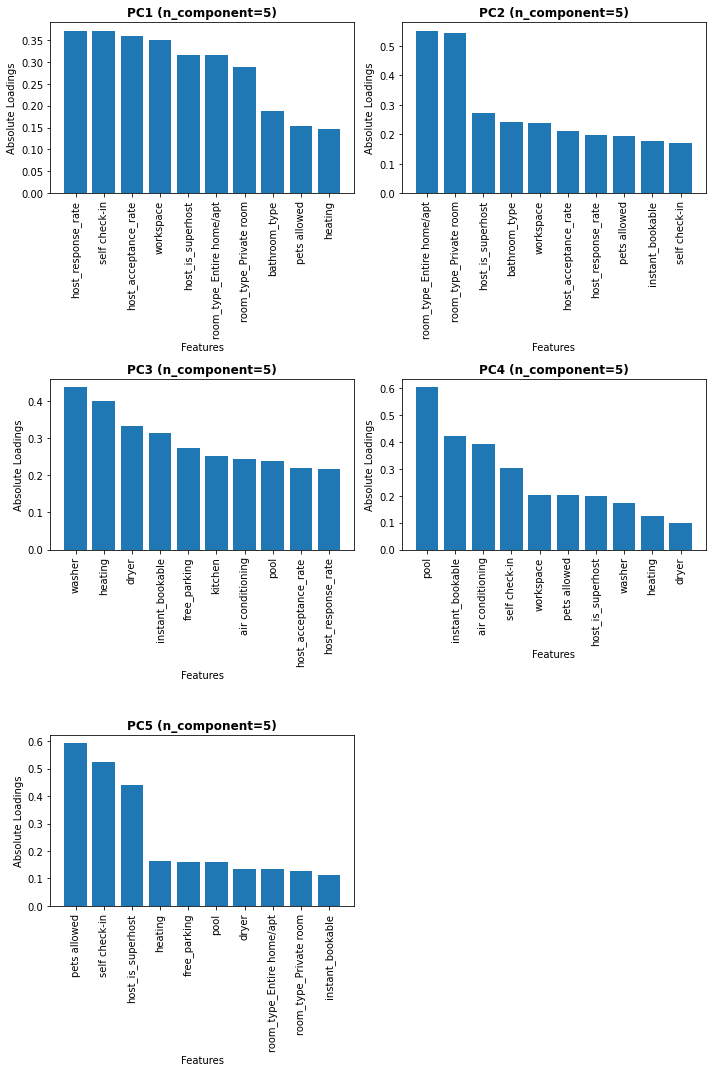

In [86]:
abs_loadings_chart(num_components= num_components, num_top_features = num_top_features)

In [53]:
def print_top_features(num_components, num_top_features):
    top_features_dict = {}
    
    for i in range(1, num_components+1):
        globals()[f'top_featuresPC{i}'] = absolute_loadings.iloc[i-1].nlargest(num_top_features)
        top_features = globals()[f'top_featuresPC{i}']
        print(f'top_featuresPC{i}:')
        print(top_features)
        print()

In [54]:
print_top_features(num_components=num_components, num_top_features=num_top_features)

top_featuresPC1:
host_response_rate           0.371723
self check-in                0.370250
host_acceptance_rate         0.359880
workspace                    0.350461
host_is_superhost            0.315586
room_type_Entire home/apt    0.315336
room_type_Private room       0.287724
bathroom_type                0.188828
pets allowed                 0.152837
heating                      0.146892
Name: 0, dtype: float64

top_featuresPC2:
room_type_Entire home/apt    0.552899
room_type_Private room       0.545533
host_is_superhost            0.272396
bathroom_type                0.240870
workspace                    0.239439
host_acceptance_rate         0.210441
host_response_rate           0.197313
pets allowed                 0.195089
instant_bookable             0.178399
self check-in                0.170820
Name: 1, dtype: float64

top_featuresPC3:
washer                  0.438840
heating                 0.402027
dryer                   0.333883
instant_bookable        0.315340
free_pa

In [55]:
explained_variance_ratios = pca.explained_variance_ratio_

# Print the explained variance ratios
print(f"Explained variance ratio of PC1: {explained_variance_ratios[0]:.2f}")
print(f"Explained variance ratio of PC2: {explained_variance_ratios[1]:.2f}")
print(f"Explained variance ratio of PC3: {explained_variance_ratios[2]:.2f}")
print(f"Explained variance ratio of PC4: {explained_variance_ratios[3]:.2f}")
print(f"Explained variance ratio of PC5: {explained_variance_ratios[4]:.2f}")

Explained variance ratio of PC1: 0.18
Explained variance ratio of PC2: 0.14
Explained variance ratio of PC3: 0.09
Explained variance ratio of PC4: 0.08
Explained variance ratio of PC5: 0.06


#### Filter by absolute loading values

In [56]:
# Edit the absolute loading values
absolute_val = 0.3

In [57]:
def absolute_loadings(loadings, num_components, num_top_features, absolute_val):
    fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(10, 15))
    axes = axes.flatten()

    for i in range(num_components):
        top_features = loadings.iloc[i].abs().nlargest(num_top_features)
        top_features = top_features[top_features > absolute_val]  # Filter by threshold

        axes[i].bar(range(len(top_features)), top_features)
        axes[i].set_xticks(range(len(top_features)))
        axes[i].set_xticklabels(top_features.index, rotation='vertical')
        axes[i].set_xlabel('Features')
        axes[i].set_ylabel('Absolute Loadings')
        axes[i].set_title(f'Absolute Loadings for PC{i+1} (n_component={num_components})', fontweight='bold')

        axes[i].set_ylim([absolute_val-0.1, axes[i].get_ylim()[1]])  # Set y-axis limit based on the threshold

    if num_components < rows * columns:
        for i in range(num_components, rows * columns):
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()

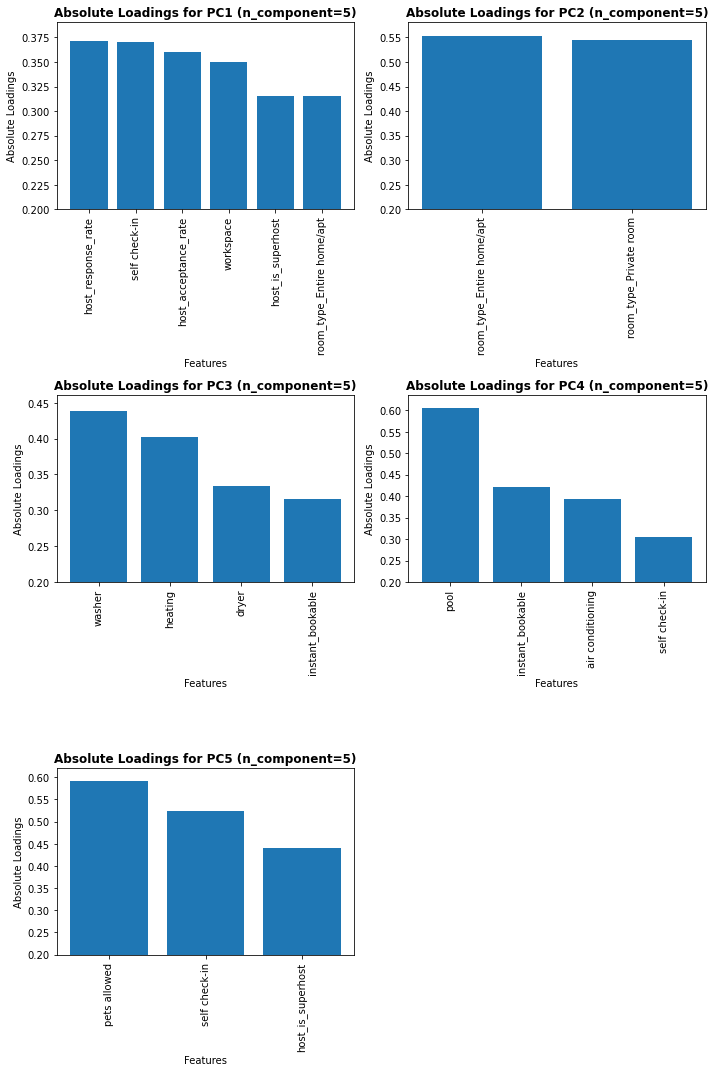

In [58]:
absolute_loadings(loadings, num_components, num_top_features, absolute_val=absolute_val)

#### Find common features across PCs

In [59]:
def count_feature_occurrences(loadings, num_components, threshold):
    feature_counts = {}
    
    for i in range(num_components):
        top_features = loadings.iloc[i].abs().nlargest(len(loadings.columns))
        relevant_features = top_features[top_features > threshold]
        
        for feature in relevant_features.index:
            if feature in feature_counts:
                feature_counts[feature] += 1
            else:
                feature_counts[feature] = 1
    
    return feature_counts


In [60]:
feature_counts = count_feature_occurrences(loadings, num_components, threshold=0.3)
feature_counts

{'host_response_rate': 1,
 'self check-in': 3,
 'host_acceptance_rate': 1,
 'workspace': 1,
 'host_is_superhost': 2,
 'room_type_Entire home/apt': 2,
 'room_type_Private room': 1,
 'washer': 1,
 'heating': 1,
 'dryer': 1,
 'instant_bookable': 2,
 'pool': 1,
 'air conditioning': 1,
 'pets allowed': 1}

In [61]:
def plot_feature_occurrences(feature_counts, min_count=1):
    filtered_counts = {feature: count for feature, count in feature_counts.items() if count > min_count}
    sorted_counts = sorted(filtered_counts.items(), key=lambda x: x[1], reverse=True)
    features, counts = zip(*sorted_counts)

    plt.bar(range(len(features)), counts)
    plt.xticks(range(len(features)), features, rotation='vertical')
    plt.xlabel('Features')
    plt.ylabel('Number of Occurrences')
    plt.title('Feature Occurrences Across Principal Components (Count > 1)')
    plt.tight_layout()
    plt.show()

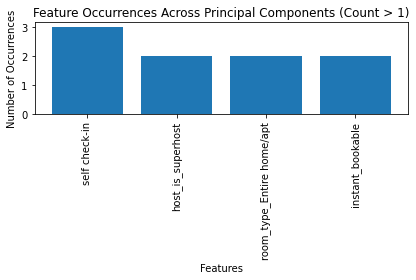

In [62]:
feature_counts = count_feature_occurrences(loadings, num_components, threshold=0.3)
plot_feature_occurrences(feature_counts)

In [63]:
pca = PCA(n_components=num_components)
transformed_data = pca.fit_transform(minmax_preprocessed_df)
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame to display the explained variance ratio
feature_importances = pd.DataFrame({'Feature': minmax_preprocessed_df.columns[:num_components], 'Explained Variance Ratio': explained_variance_ratio})
feature_importances = feature_importances.sort_values(by='Explained Variance Ratio', ascending=False)


In [64]:
print(feature_importances)

                  Feature  Explained Variance Ratio
0       host_is_superhost                  0.177392
1    host_has_profile_pic                  0.139334
2  host_identity_verified                  0.093092
3        instant_bookable                  0.077630
4           bathroom_type                  0.062221


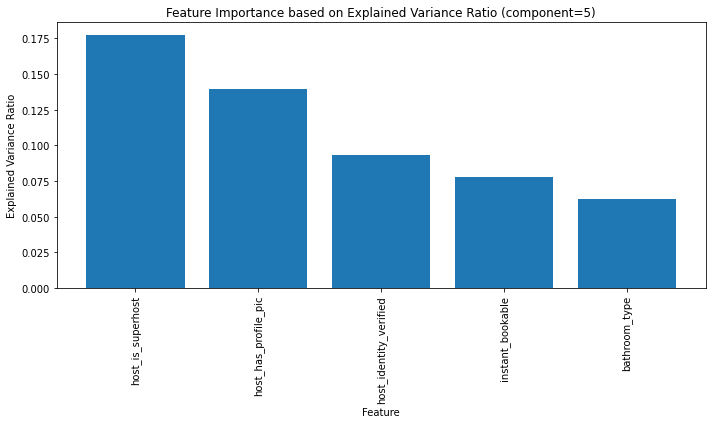

In [65]:
feature_importances_sorted = feature_importances.sort_values(by='Explained Variance Ratio', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances_sorted['Feature'], feature_importances_sorted['Explained Variance Ratio'])
plt.xlabel("Feature")
plt.ylabel("Explained Variance Ratio")
plt.title(f"Feature Importance based on Explained Variance Ratio (component={num_components})")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

_____

### NMF

In [77]:
# Convert DataFrame to numpy array
data = minmax_preprocessed_df.to_numpy()
max_components = 20

#### Find the best model

/Users/fong/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/Users/fong/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/Users/fong/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/Users/fong/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn("Maximum n

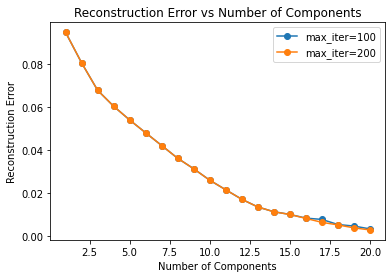

In [78]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html
# List of max_iter values to test
max_iters = [100, 200]
reconstruction_errors = {max_iter: [] for max_iter in max_iters}

# Apply to NMF
for max_iter in max_iters:
    for n_components in range(1, max_components + 1):
        nmf = NMF(n_components=n_components, init='nndsvd', max_iter=max_iter, random_state=42)
        nmf.fit(data)
        data_reconstructed = np.dot(nmf.transform(data), nmf.components_)
        error = np.mean((data - data_reconstructed) ** 2)
        reconstruction_errors[max_iter].append(error)

# Create plot
plt.figure()
for max_iter, errors in reconstruction_errors.items():
    plt.plot(range(1, max_components + 1), errors, marker='o', label=f'max_iter={max_iter}')

plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs Number of Components')
plt.legend()
plt.show()


The result of max_iter=100 or 200 are very similiar. Therefore, we will use max_iter=100 because we want to run our code faster. Also, we will pick 15 components as the second optimal choice because the trend of the lines and the reconstruction error was close to 0.

In [68]:
evaluation_results = []

# init methods
initializations = ['nndsvd', 'random', 'nndsvda', 'nndsvdar']

for init_method in initializations:
    nmf = NMF(n_components=3, 
              init=init_method,
              max_iter=100,
              random_state=42)
    nmf.fit(data)
    
    reconstructed_data = np.dot(nmf.transform(data), nmf.components_)
    reconstruction_error = mean_squared_error(data, reconstructed_data)
    evaluation_results.append((init_method, reconstruction_error))

# Print the evaluation results
for init_method, error in evaluation_results:
    print(f"Initialization Method: {init_method}")
    print(f"Reconstruction Error: {error}\n")

/Users/fong/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Initialization Method: nndsvd
Reconstruction Error: 0.06776374554822262

Initialization Method: random
Reconstruction Error: 0.0698166260033294

Initialization Method: nndsvda
Reconstruction Error: 0.06776381071693932

Initialization Method: nndsvdar
Reconstruction Error: 0.06776374601599093



Hyperparameter: init= nndsvd, max_iter = 100, n_components = 4

In [69]:
data = minmax_preprocessed_df.to_numpy()
n_features = data.shape[1]

# NMF model
nmf = NMF(n_components=3, 
          init='nndsvd', 
          max_iter=100,
          random_state=42)
nmf.fit(data)

# Get the transformed data and components
transformed_data = nmf.transform(data)
components = nmf.components_

# Find the main features
main_features = []
for component in components:
    top_feature_indices = np.argsort(component)[::-1][:10] 
    main_features.append(top_feature_indices)

for i, component_features in enumerate(main_features):
    print(f"Component {i+1} main features:")
    for feature_index in component_features:
        print(f"{minmax_preprocessed_df.columns[feature_index]}")
    print()

Component 1 main features:
room_type_Entire home/apt
kitchen
bathroom_type
host_has_profile_pic
wifi
dryer
heating
washer
air conditioning
host_identity_verified

Component 2 main features:
room_type_Private room
host_has_profile_pic
wifi
air conditioning
dryer
washer
kitchen
heating
free_parking
host_identity_verified

Component 3 main features:
host_response_rate
host_acceptance_rate
workspace
self check-in
host_is_superhost
instant_bookable
host_identity_verified
host_response_time
free_parking
bathroom_type



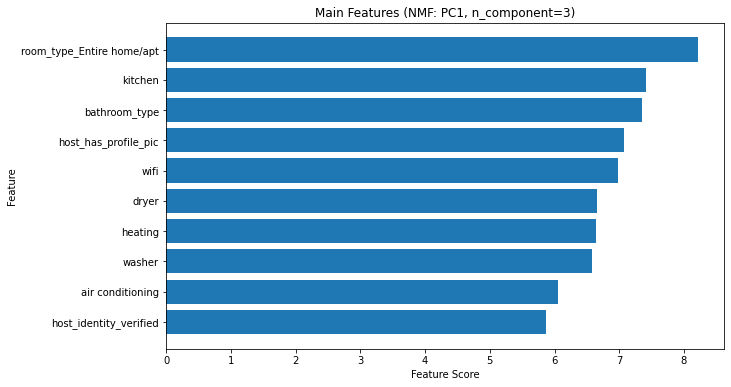

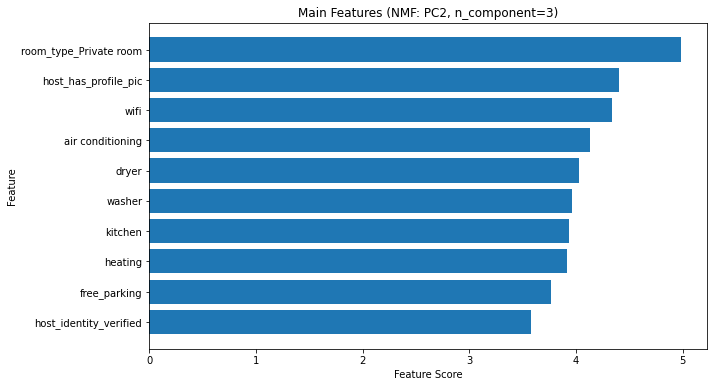

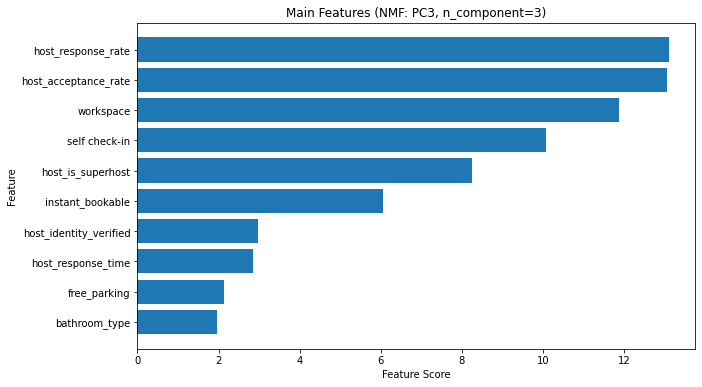

In [70]:
import pandas as pd

# Find the main features and feature scores
main_features = []
main_feature_scores = []
for component in components:
    # Adjust the number of features
    top_feature_indices = np.argsort(component)[::-1][:10] 
    main_features.append(top_feature_indices)
    main_feature_scores.append(component[top_feature_indices])

# Create a list of dictionaries to store the main features and feature scores
result = []
for i, component_features in enumerate(main_features):
    for j, feature_index in enumerate(component_features):
        feature_name = minmax_preprocessed_df.columns[feature_index]
        feature_score = main_feature_scores[i][j]
        result.append({'Component': i + 1, 'Feature': feature_name, 'Feature Score': feature_score})

# Create a DataFrame from the list of dictionaries
df_main_features = pd.DataFrame(result)
workspve, 
component1_features = df_main_features[df_main_features['Component'] == 1].sort_values('Feature Score', 
                                                                                       ascending=True)
component2_features = df_main_features[df_main_features['Component'] == 2].sort_values('Feature Score', 
                                                                                       ascending=True)

component3_features = df_main_features[df_main_features['Component'] == 3].sort_values('Feature Score', 
                                                                                       ascending=True)

# Plot the bar chart for component 1
plt.figure(figsize=(10, 6))
plt.barh(component1_features['Feature'], component1_features['Feature Score'])
plt.xlabel('Feature Score')
plt.ylabel('Feature')
plt.title(f'Main Features (NMF: PC1, n_component={nmf.n_components})')
plt.show()

# Plot the bar chart for component 2
plt.figure(figsize=(10, 6))
plt.barh(component2_features['Feature'], component2_features['Feature Score'])
plt.xlabel('Feature Score')
plt.ylabel('Feature')
plt.title(f'Main Features (NMF: PC2, n_component={nmf.n_components})')
plt.show()

# Plot the bar chart for component 3
plt.figure(figsize=(10, 6))
plt.barh(component3_features['Feature'], component3_features['Feature Score'])
plt.xlabel('Feature Score')
plt.ylabel('Feature')
plt.title(f'Main Features (NMF: PC3, n_component={nmf.n_components})')
plt.show()


In [71]:
df_main_features[df_main_features['Component']==1]

,Component,Feature,Feature Score
0,1,room_type_Entire home/apt,8.208759
1,1,kitchen,7.411151
2,1,bathroom_type,7.345841
3,1,host_has_profile_pic,7.070032
4,1,wifi,6.973386
5,1,dryer,6.648636
6,1,heating,6.635370
7,1,washer,6.574827
8,1,air conditioning,6.051861
9,1,host_identity_verified,5.862823


In [72]:
df_main_features[df_main_features['Component']==2]

,Component,Feature,Feature Score
10,2,room_type_Private room,4.981583
11,2,host_has_profile_pic,4.399503
12,2,wifi,4.332557
13,2,air conditioning,4.127432
14,2,dryer,4.031310
15,2,washer,3.962452
16,2,kitchen,3.938552
17,2,heating,3.918448
18,2,free_parking,3.765990
19,2,host_identity_verified,3.580837


In [73]:
df_main_features[df_main_features['Component']==3]

,Component,Feature,Feature Score
20,3,host_response_rate,13.105652
21,3,host_acceptance_rate,13.062331
22,3,workspace,11.883772
23,3,self check-in,10.087077
24,3,host_is_superhost,8.260776
25,3,instant_bookable,6.055508
26,3,host_identity_verified,2.965267
27,3,host_response_time,2.837439
28,3,free_parking,2.144053
29,3,bathroom_type,1.971194


In [74]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF

# Convert the DataFrame to a numpy array
data = minmax_preprocessed_df.to_numpy()

# Perform NMF
nmf = NMF(n_components=3, init='nndsvd', max_iter=100, random_state=42)
nmf.fit(data)

# Get the components
components = nmf.components_

# Calculate the cumulative feature scores
feature_scores = {}

for component_features in components:
    for feature_idx, score in enumerate(component_features):
        feature = minmax_preprocessed_df.columns[feature_idx]
        # Update the cumulative score for the feature
        if feature in feature_scores:
            feature_scores[feature] += score
        else:
            feature_scores[feature] = score

# Convert the feature scores dictionary to a DataFrame
feature_scores_df = pd.DataFrame({'Feature': list(feature_scores.keys()), 'Cumulative Score': list(feature_scores.values())})

# Sort the DataFrame by the cumulative score in descending order
feature_scores_df = feature_scores_df.sort_values(by='Cumulative Score', ascending=False)

# Print the top features with their cumulative scores
print(feature_scores_df.head(10))


                   Feature  Cumulative Score
22      host_response_rate         14.915441
23    host_acceptance_rate         14.506692
6                     wifi         13.229246
1     host_has_profile_pic         13.168410
2   host_identity_verified         12.408927
9                workspace         11.883772
16            free_parking         11.762908
11                   dryer         11.752690
4            bathroom_type         11.481701
7                  kitchen         11.349702


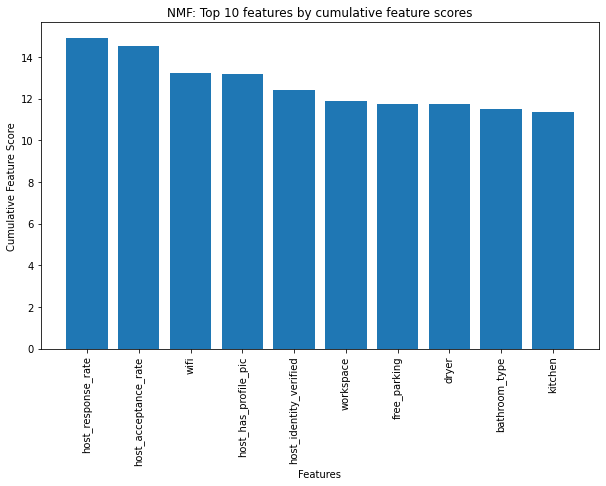

In [75]:
top_10_features = feature_scores_df.iloc[:10]

# Create the bar chart for top 10 features
plt.figure(figsize=(10, 6))
plt.bar(top_10_features['Feature'], top_10_features['Cumulative Score'])
plt.xlabel('Features')
plt.ylabel('Cumulative Feature Score')
plt.title('NMF: Top 10 features by cumulative feature scores')
plt.xticks(rotation=90)
plt.show()


In [76]:
import numpy as np
from sklearn.decomposition import NMF
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Assuming you have your preprocessed data in 'minmax_preprocessed_df' as a DataFrame

# Convert DataFrame to numpy array
data = minmax_preprocessed_df.to_numpy()

# Define your NMF model
nmf = NMF(random_state=42)

# Define the parameter grid to search
param_grid = {
    'nmf__n_components': [3, 4, 5, 6, 13,14],
    'nmf__init': ['nndsvd', 'random', 'nndsvda', 'nndsvdar']
}

# Create a pipeline with NMF as a step
pipeline = Pipeline([
    ('nmf', nmf),
])

# Create the GridSearchCV object with the desired scoring metric
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the data to perform grid search
grid_search.fit(data)

# Get the best parameters and best score
best_params = grid_search.best_params_

print("Best parameters:", best_params)

/Users/fong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/fong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Users/fong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/fong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 685, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.

Best parameters: {'nmf__init': 'nndsvd', 'nmf__n_components': 3}
